In [3]:
import numpy as np 
import pandas as pd 

import  matplotlib.pyplot as  plt

## 📌 Justification for Using Polynomial Regression

Given a dataset:

\[
\begin{array}{|c|c|}
\hline
x & y \\
\hline
1 & 2 \\
2 & 5 \\
3 & 10 \\
4 & 17 \\
5 & 26 \\
6 & 37 \\
7 & 50 \\
8 & 65 \\
9 & 82 \\
10 & 101 \\
\hline
\end{array}
\]

### 🔍 Observations:
The output \( y \) increases at an accelerating rate as \( x \) increases, which indicates a **non-linear** relationship.  
For example:
- \( x: 1 \rightarrow 2 \Rightarrow \Delta y = 3 \)
- \( x: 9 \rightarrow 10 \Rightarrow \Delta y = 19 \)

This kind of growth cannot be captured by a linear model:

\[
y = \beta_0 + \beta_1 x
\]

### ✅ Why Polynomial Regression?

To capture the curvature in the data, we use **Polynomial Regression**:

\[
y = \beta_0 + \beta_1 x + \beta_2 x^2 + \cdots + \beta_n x^n
\]

This allows the model to fit more complex patterns (such as quadratic, cubic curves).

---

### 🎯 Learning Objective

The purpose of applying Polynomial Regression here is to:

- Understand the **limitations of simple linear models**.
- Visualize how polynomial terms (e.g., \( x^2, x^3 \)) improve the fit.
- Learn to choose an appropriate **degree \( n \)** of the polynomial to balance:
  - **Underfitting** (too simple),
  - **Overfitting** (too complex).

By plotting both linear and polynomial models, we develop a clear understanding of when and why polynomial regression is necessary.

---


x shape =  (10,)
y shape =  (10,)


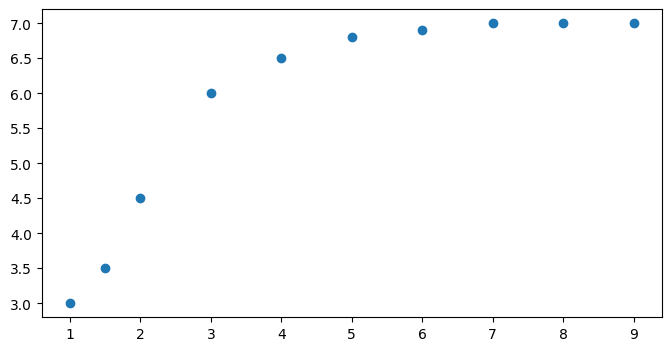

In [4]:
#create dataset
x = np.array([1, 1.5, 2, 3, 4, 5, 6, 7, 8, 9])
y = np.array([3, 3.5, 4.5, 6, 6.5, 6.8, 6.9, 7, 7, 7])
print ("x shape = ",x.shape)
print ("y shape = ",y.shape)

#plot the data points
plt.figure(figsize=(8, 4))
plt.scatter(x,y)
plt.show()

In [5]:
x=x.reshape(-1,1)
x.shape


(10, 1)

In [6]:
class LinearRegrssion:
    def __init__(self,iteration,lr):
        self.iteration=iteration
        self.lr =lr
        
    def scaled(self,x):
        mean =x.mean()
        scaled=(x-mean)/np.std(x)
        return scaled

        
        
    def fit(self , x , y):
        self.thetai=np.random.rand(x.shape[1])
        self.theta0=.2
        self.m_sample=x.shape[0]
        self.losses=[]
        
        
        for i in range(self.iteration):
            h_x =self.theta0+np.dot(self.thetai,x.T)
            cost=(1/self.m_sample )*np.sum((h_x-y)**2)
            self.losses.append(cost)
            
            theta0_d= (2/self.m_sample )*np.sum(h_x-y)
            thetai_d=(2/self.m_sample )*np.dot(x.T,(h_x-y))
            
            self.theta0 -= self.lr *theta0_d
            self.thetai -= self.lr *thetai_d
            
    def predict(self,x):
        self.scaled(x)
        pred =self.theta0+np.dot(self.thetai,x.T)
        return pred
        

In [7]:
obj = LinearRegrssion(iteration=10000 , lr=0.01)
obj.scaled(x)
obj.fit(x,y)
obj.losses

[4.63233374261556,
 3.5379419508477983,
 3.331639156026162,
 3.275067637120691,
 3.2439149060058945,
 3.21724960260974,
 3.1915457092528423,
 3.1662076037532176,
 3.1411330465023988,
 3.1163028829886006,
 3.0917119656296714,
 3.067357523542533,
 3.0432372042913296,
 3.0193487440187448,
 2.9956899117348144,
 2.9722584997647568,
 2.9490523219698455,
 2.9260692132785837,
 2.9033070294401213,
 2.8807636468166993,
 2.858436962184249,
 2.836324892535963,
 2.814425374887919,
 2.792736366086601,
 2.771255842618283,
 2.749981800420242,
 2.728912254693782,
 2.7080452397190573,
 2.6873788086716837,
 2.666911033441103,
 2.646640004450696,
 2.626563830479624,
 2.6066806384863854,
 2.5869885734340685,
 2.5674857981172816,
 2.5481704929907467,
 2.5290408559995425,
 2.5100951024109808,
 2.4913314646480895,
 2.4727481921247136,
 2.4543435510821854,
 2.436115824427568,
 2.4180633115734658,
 2.4001843282793516,
 2.3824772064944435,
 2.3649402942020763,
 2.3475719552655785,
 2.3303705692756176,
 2.3133345

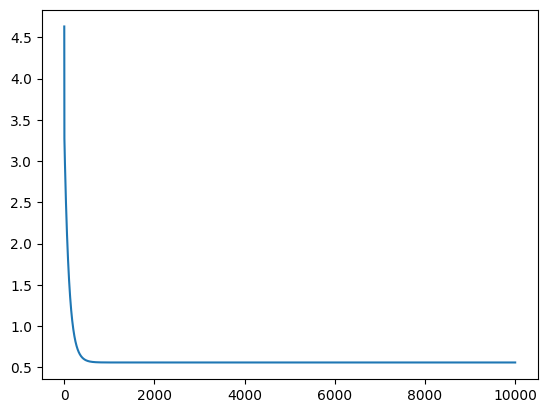

In [8]:
plt.plot(obj.losses)

In [9]:
x_line =np.linspace(min(x),max(x),10)

In [10]:
g=obj.theta0 +obj.thetai*x_line

In [11]:
print(obj.theta0 ,obj.thetai)

3.5927138331572945 [0.47898627]


In [12]:
y_pred=obj.predict(x)

In [13]:
m_sample=x.shape[0]
m_sample


10

In [14]:
mes = (1/m_sample)*np.sum(y-y_pred)

In [15]:
mes

1.1013412404281553e-14

In [16]:
rmse=np.sqrt(mes)
rmse

1.0494480646645432e-07

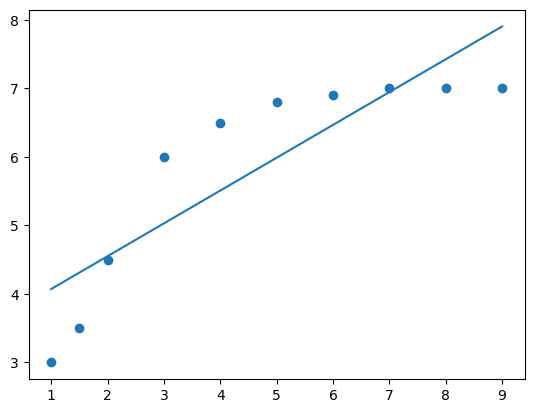

In [17]:
plt.plot(x,y_pred)
# plt.plot(g)
plt.scatter(x,y)

# 🚫 Problem with Linear Regression on Polynomial Data

Given a dataset where the relationship between \( x \) and \( y \) is **non-linear**, such as:

\[
y = x^2 + 1
\quad \text{or} \quad
y = x^2 + x + 1
\]

Trying to apply **Linear Regression** will result in a poor model fit, because linear regression assumes a straight-line relationship:

\[
y = \beta_0 + \beta_1 x
\]

---

## ⚠️ Why This is a Problem (Underfitting)

Linear regression can only capture **constant rate of change** in the data. But in our case:

- When \( x \) increases, the **rate of change in \( y \)** also increases.
- Linear regression cannot learn **curved patterns**, and will **underfit** the data.

### Underfitting happens when:
- The model is too simple.
- It misses important patterns in the data.
- The predictions are far from actual values.

---

## ✅ Solution: Use Polynomial Regression

Polynomial regression models a curve by including higher-order terms of \( x \). The general equation is:

\[
y = \beta_0 + \beta_1 x + \beta_2 x^2 + \cdots + \beta_n x^n
\]

Where:
- \( n \) is the **degree** of the polynomial.
- Increasing \( n \) gives the model more flexibility to capture complex patterns.

---

## 📌 Suggested Polynomial Equations

Here are some possible polynomial equations that could fit our sample data:

1. Quadratic Model:

\[
y = x^2 + 1
\]

2. Quadratic + Linear Term:

\[
y = x^2 + x + 1
\]

3. Cubic Model:

\[
y = 0.1x^3 + 0.5x^2 + x + 1
\]

4. General Polynomial (degree = 3):

\[
y = \beta_0 + \beta_1 x + \beta_2 x^2 + \beta_3 x^3
\]

---

## 📈 Conclusion

- Use **Polynomial Regression** when the data clearly follows a curved trend.
- Always **visualize the data** before choosing the model.
- Be cautious: higher-degree polynomials can **overfit** the data.

---


In [18]:
y=y.reshape(-1,1)

In [19]:
import numpy as np

class PolyLinearRegression:
    def __init__(self, iteration, lr, degree=2):
        self.iteration = iteration
        self.lr = lr
        self.degree = degree

    def scaled(self, x):
        self.mean = np.mean(x, axis=0)
        self.std = np.std(x, axis=0)
        return (x - self.mean) / self.std

    def transform(self, x):
        n = x.shape[0]
        x_transformed = np.ones((n, 1))  # x^0 = 1 (for bias term)
        for j in range(1, self.degree + 1):
            x_power = np.power(x, j)
            x_transformed = np.append(x_transformed, x_power, axis=1)
        return x_transformed

    def fit(self, x, y):
        x = self.scaled(x)
        x_p = self.transform(x)
        self.thetas = np.random.rand(x_p.shape[1], 1)  # includes bias
        self.n = x.shape[0]
        self.losses = []

        for _ in range(self.iteration):
            h_x = np.dot(x_p, self.thetas)
            cost = (1 / self.n) * np.sum((h_x - y) ** 2)
            self.losses.append(cost)

            grad = (2 / self.n) * np.dot(x_p.T, (h_x - y))
            self.thetas -= self.lr * grad

    def predict(self, x):
        x = (x - self.mean) / self.std
        x_p = self.transform(x)
        return np.dot(x_p, self.thetas)


In [28]:
plo = PolyLinearRegression(iteration=10000 , lr=0.001 ,degree=2)

plo.fit(x,y)


In [29]:
plo.transform(x)

array([[ 1.  ,  1.  ,  1.  ],
       [ 1.  ,  1.5 ,  2.25],
       [ 1.  ,  2.  ,  4.  ],
       [ 1.  ,  3.  ,  9.  ],
       [ 1.  ,  4.  , 16.  ],
       [ 1.  ,  5.  , 25.  ],
       [ 1.  ,  6.  , 36.  ],
       [ 1.  ,  7.  , 49.  ],
       [ 1.  ,  8.  , 64.  ],
       [ 1.  ,  9.  , 81.  ]])

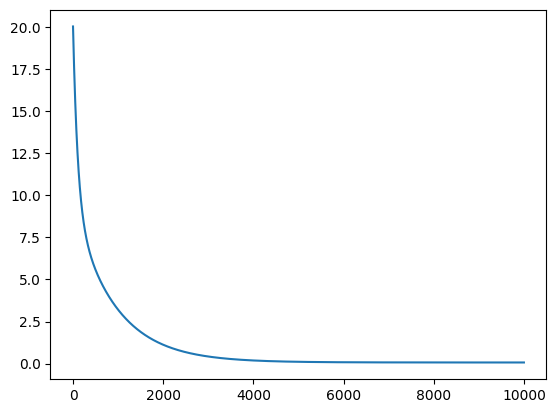

In [30]:
plt.plot(plo.losses)

In [31]:
mes = (1/m_sample)*np.sum(y-y_pred)
mes

1.1022294188478555e-13

In [32]:
y_pred=plo.predict(x)

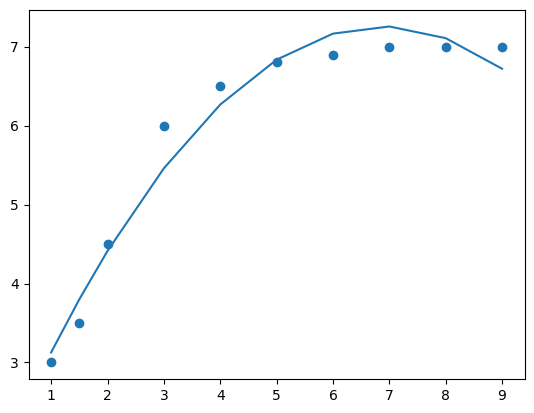

In [33]:
plt.scatter(x,y)
plt.plot(x,y_pred)